In [19]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import numpy as np
import matplotlib.pyplot as plt

In [20]:
class SpectralCluster:
    
    def __init__(self, n_clusters, n_neighbors=5):
        self.n_clusters = n_clusters
        self.n_neighbors = n_neighbors
        self.clustering_model = None

    def fit(self, data):
        
        pairwise_distances = np.linalg.norm(data[:, np.newaxis] - data, axis=-1)

        adjacency_matrix = np.zeros_like(pairwise_distances)
        indices = np.argsort(pairwise_distances, axis=1)[:, :self.n_neighbors + 1]
        for i, neighbors in enumerate(indices):
            adjacency_matrix[i, neighbors] = 1

        affinity_matrix = np.maximum(adjacency_matrix, adjacency_matrix.T)
        normalized_affinity = normalize(affinity_matrix, norm='l1', axis=1)
        laplacian_matrix = np.eye(affinity_matrix.shape[0]) - normalized_affinity
        eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)
        
        sorted_indices = np.argsort(eigenvalues)
        sorted_eigenvectors = eigenvectors[:, sorted_indices]
        spectral_embedding = sorted_eigenvectors[:, 1:self.n_clusters + 1]
        
        self.clustering_model = KMeans(n_clusters=self.n_clusters)
        self.clustering_model.fit(spectral_embedding)

    def predict(self):
        return self.clustering_model.labels_

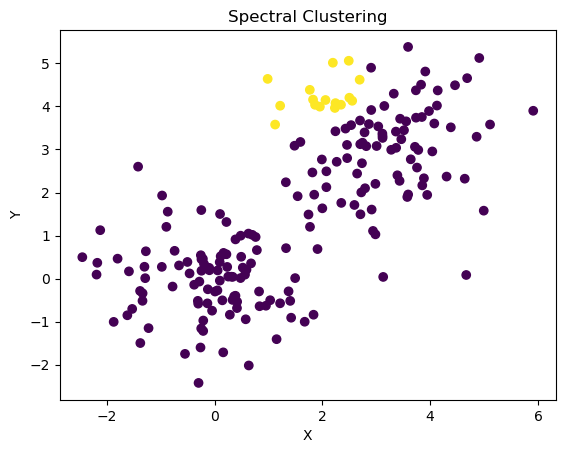

In [17]:
cluster1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 100)
cluster2 = np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], 100)
data = np.concatenate((cluster1, cluster2))

spectral_cluster = SpectralCluster(n_clusters=2)
spectral_cluster.fit(data)
predictions = spectral_cluster.predict()

plt.scatter(data[:, 0], data[:, 1], c=predictions)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Spectral Clustering')
plt.show()
